# Caso 2: mezcla de canales digitales

---
## Maestría en Inteligencia Analítica para la Toma de Decisiones (MIIA)

* **Profesor**: 
    * *Andrés Medaglia*
* **Instructora**:
    * *Alfaima Solano*

## Instrucciones generales

El primer paso antes de resolver este laboratorio es leer y entender el **enunciado del caso**. Una vez tengas claro el caso, te explicamos la estructura de este laboratorio (los demás laboratorios siguen una estrucutra similar). 

Este laboratorio tiene las siguientes secciones: 
* **Formulación**: un breve resumen del modelo con notación matemática y descripción de sus componentes
* **Importación de librerías**
* **Creación de parámetros**
* **Modelamiento**: aquí implementamos el modelo visto en la formulación (aquí encontrarás por lo general celdas de código que debes completar, ¡nosotros te guiaremos en el proceso!)
* **Reporte de Resultados**: esta sección nos muestra las soluciones encontradas por el modelo y, en ocasiones, algunas visualizaciones interesantes para entenderlo mejor. (es posible que en ciertas prácticas debas completar algunas celdas también)

Este tipo de actividades se evaluará sobre un total de 100 puntos. Las celdas calificables se distinguen por tener la instrucción `# Escribe tu código a continuación`. Antes de estas celdas  encontrarás instrucciones y consejos para resolver las preguntas, también el puntaje que le corresponde.

¡Éxitos!

## Formulación
---

Te presentamos la formulación del caso de la semana de forma resumida. Te recomendamos revisar la formulación una vez hayas leído el enunciado del caso. Es bueno que te familiarices con los elementos de la formulación antes de iniciar la implementación.

### Conjuntos y Parámetros
>#### **Conjuntos**
>* $I$: conjunto de canales de mercadeo.

>#### **Parámetros**
>* $a_i:$ incremento en ventas por cada dólar invertido en el canal $i \in I$
>* $c_i:$ presupuesto máximo para invertir en el canal $i\in I$
>* $p:$ presupuesto total para la campaña
>* $q:$ mínimo porcentaje de inversión en el canal Facebook

### Variables de Decisión
> $x_i:$ dinero a ser invertido (en USD) en el canal $i\in I$


### Restricciones
> 1. Cada canal $i\in I$ tiene un máximo posible de inversión estipulado $c_i$
>> $x_i \leq c_i, \; \forall i\in I$

> 2. El presupuesto global para la campaña es de $p$
>> $\sum_{i\in I} x_i \leq p$

> 3. La inversión en las publicaciones promocionadas de Facebook debe seguir siendo superior a q (0.3) del total de inversión.
>> $q*\sum_{i\in I}x_i \leq x_{\text{Facebook}}$

> **Naturaleza de Variables**
>>$x_i\geq 0 , \; \forall i\in I$

### Función Objetivo
> Maximizar el incremento en ventas dado por la inversión en canales de mercadeo.
>> $\max{ \sum_{i\in I} a_ix_i}$

## Importación de librerías
---
En este curso usaremos el paquete/librería `pulp` en su versión 2.4. Este paquete proporciona un modelador de problemas lineales de optimización para Python. Su API permite crear variables, añadir restricciones y llamar optimizadores (gratuitos y pagos para resolver problemas). A través de este paquete se generan los archivos `LP`que son usados por los *optimizadores* para ejecutar los algoritmos de optimización. `pulp` utiliza por defecto el optimizador CBC que es mantenido por la comunidad de [COIN-OR](https://www.coin-or.org) y es de fuente libre. También puede ser usado con optimizadores pagos como Gurobi o CPLEX. Su alias para este curso el `lp`. Si deseas conocer más, puedes visitar:
>**GitHub**: https://github.com/coin-or/pulp

>**Documentación**: https://coin-or.github.io/pulp/

La forma más fácil de instalar `pulp` es a través de PyPi ejecutando el comando de `pip`: ` python -m pip install pulp` en la consola. También está disponible en conda y [conda-forge](https://anaconda.org/conda-forge/pulp)

Con el paquete `pulp` introduciremos métodos para crear diccionarios de variables (basados en conjuntos) y una forma fácil de formular expresiones que usan conjuntos en las sumas.

> **Recuerda** que el alias de `pulp` es `lp` y que como estándar el nombre del objeto que guardará el problema de optimización se llamará `problema`.

In [5]:
import pulp as lp

## Creación de Parámetros
---

Para este caso nuestro único conjunto son los canales de mercadeo que escogeremos. Haremos una lista de Python donde guardaremos el nombre de cada canal. 

### Conjuntos
$I$: Conjunto de canales de mercadeo

In [2]:
I = ["Facebook", "YouTube", "Twitter", "TikTok", "LinkedIn"]

### Parámetros
* $a_i:$ Incremento en ventas por cada dólar invertido en el canal $i \in I$
* $c_i:$ Presupuesto máximo para invertir en el canal $i\in I$
* $p:$ Presupuesto total para la campaña
* $q:$ Mínimo porcentaje de inversión en el canal Facebook


Para crear los parámetros construiremos diccionarios cuyas **llaves** correspondan los índices del conjunto y como **valores** el valor del parámetro correspondiente. 

In [4]:
a = {canal: val for canal, val in zip(I, (2,5,3,4.5,2.9))} #Incremento en ventas por dolar invertido en cada canal
c = {canal: val for canal, val in zip(I, (3000,4000,2000,2000,3000))} #Presupuesto máximo para invertir en cada canal
p = 10000 #Presupuesto total para la campaña
q = 0.3 #0.3   #Mínimo porcentaje de inversión en el canal 'Facebook' (30%)

**Celda de Prueba (0 puntos)**

Recomendación: Una buena práctica es explorar los datos de entrada del problema antes de empezar a implementarlo y resolverlo. Por ejemplo, uno podría entender el contexto los datos al graficarlos o explorando las tablas o estructuras en las que vienen. 
* **Esta celda no es calificable**

In [94]:
### Aquí puedes explorar los parámetros



## Modelado
---

### Declaración del modelo
El primer paso para desarrollar un problema de optimización en `pulp` es declarar el objeto `lp.LpProblem` en el cual podemos agregar variables, restricciones y la función objetivo. Como convención para todos los trabajos y entregas de este curso, este objeto se llamará `problema`. Este objeto nos permite añadir los componentes del problema de optimización.

El método `lp.LpProblem()` crea un problema lineal de optimización.

**Pregunta 1 (10 puntos)**
* Crea un objeto modelo en PuLP (`lp.LpProblem`) llamado `problema`
* Indica el sentido de la optimización: maximizar o minimizar


> **Recuerda** que el sentido se indica con el argumento `sense` en `lp.LpProblem()`, que toma valores `lp.LpMaximize` o `lp.LpMinimize`

In [95]:
problema = lp.LpProblem("Maximizar ganancias", lp.LpMaximize)

## Variables de decisión
* $x_i:$ Dinero a ser invertido (en USD) en el canal de mercadeo $i\in I$

**Pregunta 2 (20 puntos)**

* Crea las variables del modelo: `x`, usando el método `lp.LpVariable.dicts()`
* Especifica el nombre de las variables como `'canales'` con el argumento `name`
* Especifica los índices de las variables con el argumento `indexs` (aquí debes colocar el conjunto)
* Especifica el tipo de variable con el argumento `cat` (continua: `lp.LpContinuous`, entera: `lp.LpInteger` o binaria: `lp.LpBinary`)
* Especifica el límite inferior en 0 con el argumento `lowBound`

> **Para crear una variable** usa el método `lp.LpVariable.dicts(name, indexs, lowBound=None, upBound=None, cat='Continuous')`

> Donde:
> - `name`: el nombre de la variable
> - `indexs`: lista de las llaves que tendrá el diccionario de variables. Normalmente corresponde a los conjuntos
> - `lowBound`: el límite inferior de la variable. Por defecto es `None`, esto es, el infinito negativo
> - `upBound` : el límite superior de la variable. Por defecto es `None`, esto es, el infinito positivo
> - `cat`: el tipo de variable: continua: `lp.LpContinuous`, entera: `lp.LpInteger` o binaria: `lp.LpBinary`



In [96]:
x = lp.LpVariable.dicts("Canales", I, lowBound=0, cat=lp.LpContinuous)

### Función Objetivo
> Maximizar el incremento en ventas dado por la inversión en canales de mercadeo.
>> $\max{ \sum_{i\in I} a_ix_i}$


**Pregunta 3 (20 puntos)**
* Crea la función objetivo y agregala al modelo `problema`. A continuación, te explicamos como se usan las sumatorias en `pulp`

> **Recuerda** que para agregar una función objetivo o restricción a un modelo en pulp se usa la sintaxis: `<modelo> += <expresion>`

> **Recuerda** que una función objetivo en `pulp` consiste en multiplicar variables de tipo `lp.pulp.Variable` (como `x`) por constantes así: `<variable>*<int|float>` y luego sumarlas o restarlas así: `<var1>*<const1> + <var2>*<const2>`

> **Recuerda** que, para evitar escribir una sumatoria de muchos términos uno a uno, `pulp` permite crear sumatorias que recorran conjuntos siempre y cuando las variables esten indexadas (como `x`). Para esto, utiliza `lp.lpSum((<expresion> for <indices> in <conjuntos>))`. 

> **Ejemplo**:
>> $ \sum_{i \in I}c_i x_i$
es equivalente a `lp.lpSum((c[i]*x[i] for i in I))`

In [97]:
problema += lp.lpSum([a[i] * x[i] for i in I]), "Funcion Objetivo"


### Restricciones

> **Recuerda** que para crear restricciones se debe usar la sintaxis: `<modelo> += <expresion_lado_izq> ==|>=|<= <expresion_lado_der>, 'Nombre_de_la_restriccion'`

> **Recuerda** que las expresiones son combinaciones lineales de las variables, como: `<var1>*<const1> + <var2>*<const2>`

> **Recuerda** que puedes usar `lp.lpSum()` para crear sumatorias (ver **Pregunta 3**)

> **Recuerda** que para crear múltiples restricciones usando $\forall i \in I$, se debe utilizar la sintaxis:
>>    * `for i in I:` 
>>       * `<restriccion>`

> **Ejemplo**
>> La siguiente restricción: $\sum_{i \in I} a_{ij} x_{ij} \geq 1, \; \forall j \in J$ es equivalente a:
>>    * `for j in J:`
>>        * `<modelo> += lp.lpSum((a[i,j]*x[i,j] for i in I)) >= 1, 'R1_'+str(j)`
  
> **Advertencia**: `pulp` no permite sobreescribir restricciones, entonces, si ya creaste una restricción y quieres crearla de nuevo para corregir algo, asegúrate de volver a crear el modelo `problema` desde el principio (nosotros haremos esto antes de calificar, no te preocupes).

**Pregunta 4 (10 puntos)**

* Crea la siguiente restricción, asignale el nombre `'R1_'+str(<indice_del_para_todo>)` y añadela al modelo:

> 1. Cada canal $i\in I$ tiene un máximo posible de inversión estipulado $c_i$
>> $x_i \leq c_i ,\; \forall i\in I$

In [98]:
for i in I:
    problema += x[i] <= c[i], "R1_" + str(i)

**Pregunta 5 (10 puntos)**

* Crea la siguiente restricción, asignale el nombre `'R2'` y añadela al modelo:

> 2. El presupuesto global para la campaña es de $p$
>> $\sum_{i\in I} x_i \leq p$

In [99]:
problema += lp.lpSum(x[i] for i in I) <= p, "R2"
    

**Pregunta 6 (10 puntos)**

* Crea la siguiente restricción, asignale el nombre `'R3'` y añadela al modelo:

> 3. La inversión en las publicaciones promocionadas de Facebook debe seguir siendo superior a q (0.3) del total de inversión.
>> $q*\sum_{i\in I}x_i \leq x_{\text{Facebook}}$

In [100]:
problema += q*lp.lpSum(x[i] for i in I) <= x["Facebook"],"R3"


### Invocar el optimizador

Ahora que el modelo está listo, viene la mejor parte: ¡Correr el modelo! La celda a continuación se encarga de llamar al optimizador de `pulp` y guardar las soluciones del modelo (si llega a optimalidad). Más adelante extraeremos la solución y otras métricas de interés del objeto `problema` y del diccionario de variables `x`.

In [101]:
solucion=problema.solve()
solucion

1

In [102]:
problema

Maximizar_ganancias:
MAXIMIZE
2*Canales_Facebook + 2.9*Canales_LinkedIn + 4.5*Canales_TikTok + 3*Canales_Twitter + 5*Canales_YouTube + 0.0
SUBJECT TO
R1_Facebook: Canales_Facebook <= 3000

R1_YouTube: Canales_YouTube <= 4000

R1_Twitter: Canales_Twitter <= 2000

R1_TikTok: Canales_TikTok <= 2000

R1_LinkedIn: Canales_LinkedIn <= 3000

R2: Canales_Facebook + Canales_LinkedIn + Canales_TikTok + Canales_Twitter
 + Canales_YouTube <= 10000

R3: - 0.7 Canales_Facebook + 0.3 Canales_LinkedIn + 0.3 Canales_TikTok
 + 0.3 Canales_Twitter + 0.3 Canales_YouTube <= 0

VARIABLES
Canales_Facebook Continuous
Canales_LinkedIn Continuous
Canales_TikTok Continuous
Canales_Twitter Continuous
Canales_YouTube Continuous

## Reporte de resultados
---

**Estado del optimizador, función objetivo y otros indicadores**

A continuación puede evaluar la función objetivo óptima además de el estado del optimizador.
> **Recuerda** que al finalizar de correr el modelo, `<modelo>.status` tomará un valor de 1, -1, -2 o -3, que hace referencia a algún estado del optmizador:
*  0 $\rightarrow$ Sin Resolver: No se ha usado `<modelo>.solve()`
*  1 $\rightarrow$ Óptimo
* -1 $\rightarrow$ Infactible
* -2 $\rightarrow$ No acotado 
* -3 $\rightarrow$ Otros

> **Recuerda** que `lp.LpStatus` es un diccionario en PuLP que tiene como llaves los `status` del optimizador (número) en `<modelo>.status`, y para cada `status` contiene el estado del optimizador en palabras.

> **Recuerda** que puedes inspeccionar el contenido de `lp.LpStatus`, simplemente corriendolo en una celda

> **Recuerda** que `<modelo>.objective` contiene la **expresión** de la función objetivo, sin embargo, para conocer el valor de la función objetivo se debe reemplazar los valores de las variables en la solución dentro de esta expresión. Por fortuna, PuLP tiene una función que hace justo eso: `lp.value(<expresion>)`.



In [103]:
print("El incremento en ventas debido a la campaña es = ", lp.value(problema.objective))

El incremento en ventas debido a la campaña es =  38000.0


**Pregunta 7 (5 puntos)**

Crea un diccionario llamado `resultados`.
Coloca como **llaves** los diferentes canales en el conjunto $I$.
Coloca como **valores** la cantidad de dinero a invertir en cada canal.

Por ejemplo, el primer registro del diccionario se ve así: `"Facebook": 3000.0`

>**Recuerde** que las variables `LpVariable` se almacenaron en un diccionario llamado `x` el cual tiene como llave el índice (del conjunto $I$) de la variable y como valor el objeto tipo `LpVariable`. 

>**Recuerde** que para obtener el valor actual de un objeto tipo `LpVariable`  puede usar su método `LpVariable.value()`.

In [104]:
for v in problema.variables():
    print(v.name,"=",v.varValue)
    
resultados={v.name: v.varValue for v in problema.variables()}
resultados

Canales_Facebook = 3000.0
Canales_LinkedIn = 0.0
Canales_TikTok = 2000.0
Canales_Twitter = 1000.0
Canales_YouTube = 4000.0


{'Canales_Facebook': 3000.0,
 'Canales_LinkedIn': 0.0,
 'Canales_TikTok': 2000.0,
 'Canales_Twitter': 1000.0,
 'Canales_YouTube': 4000.0}

**Pregunta 8 (5 puntos)**

* Importa el paquete matplotlib.pyplot bajo el alias plt.
* Crea una lista llamada `y` donde guardes los **valores** de la cantidad de dinero a invertir en cada canal.
* Usa el conjunto $I$ y la lista `y` para graficar el resultado.

C:\Users\David\AppData\Local\Temp\ipykernel_27424\1002210463.py:44: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, pad=0.05, aspect=10)


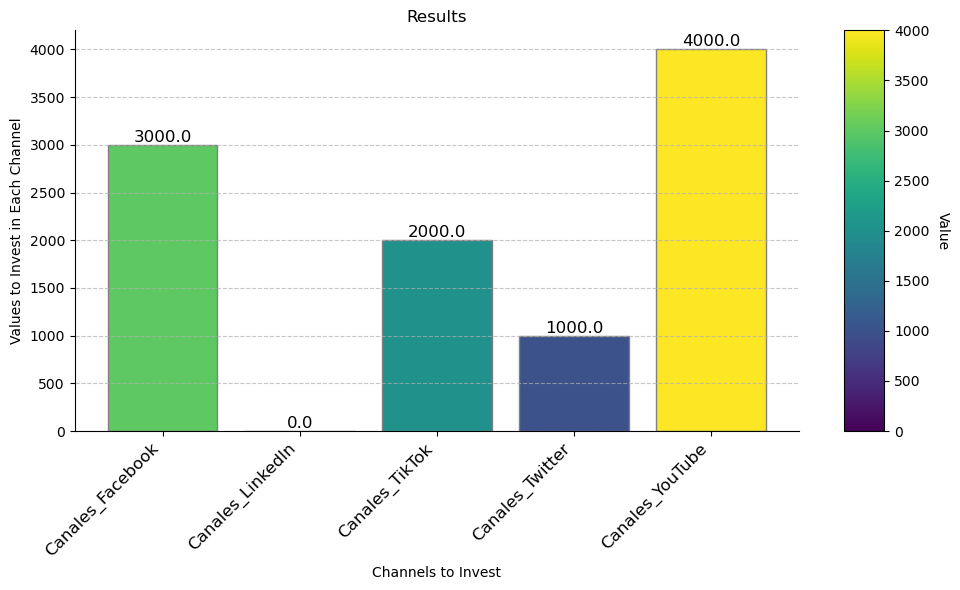

In [105]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
channels = list(resultados.keys())
values = list(resultados.values())


plt.figure(figsize=(10, 6))  # Adjust figure size


norm = plt.Normalize(min(values), max(values))
colors = cm.viridis(norm(values))

# Create a bar plot with customized colors and edgecolor
bars = plt.bar(channels, values, color=colors, edgecolor='gray')

# Add data values on top of the bars
for bar, value in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height() + 0.3,             # Y position
        f'{value}',                         # Text
        ha='center',                        # Horizontal alignment
        va='bottom',                        # Vertical alignment
        fontsize=12,                        # Font size
        color='black'                       # Text color
    )

# Add labels and title
plt.xlabel("Channels to Invest")
plt.ylabel("Values to Invest in Each Channel")
plt.title("Results")

# Customize tick labels
plt.xticks(rotation=45, ha='right', fontsize=12)
# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])  # No data is being plotted
cbar = plt.colorbar(sm, pad=0.05, aspect=10)
cbar.set_label("Value", rotation=270, labelpad=15)

# Show the plot
plt.tight_layout()  
plt.show()

**Pregunta 9 (10 puntos)**

¿Qué recomendación le darías a la empresa? Prueba alguna variación del presupuesto, explica y concluye. 



In [107]:
for constraint_name, constraint in problema.constraints.items():
    print(f"Constraint {constraint_name}: Shadow Price = {constraint.pi}")

Constraint R1_Facebook: Shadow Price = -0.0
Constraint R1_YouTube: Shadow Price = 2.0
Constraint R1_Twitter: Shadow Price = -0.0
Constraint R1_TikTok: Shadow Price = 1.5
Constraint R1_LinkedIn: Shadow Price = -0.0
Constraint R2: Shadow Price = 2.7
Constraint R3: Shadow Price = 1.0


La solución óptima arroja un enfoque efectivo para maximizar las ganancias por cada dólar invertido en diferentes canales de marketing. En este caso, se asignarían los montos siguientes: 3,000 a Facebook, 0 a LinkedIn, 2,000 a TikTok, 1,000 a Twitter y 4,000 a YouTube. Siguiendo estas asignaciones mientras se respetan las restricciones, se logra alcanzar el valor máximo de la función objetivo, que es 38,000. Esto significa que distribuir el presupuesto entre estos canales según la solución óptima conllevaría al mayor aumento en las ventas posible, considerando las condiciones dadas.

Ahora, al examinar los precios sombra de cada restricción, se revela un aspecto sumamente interesante: observamos que por cada dólar invertido en YouTube, obtenemos el doble de ganancia en la función objetivo. Esto implica que incrementar el presupuesto para YouTube y TikTok (que tienen un precio sombra de 1.5) podría llevar a mejores resultados al maximizar las ganancias. Además, si eliminamos la restricción que nos obliga a invertir al menos el 0.3 del presupuesto total en Facebook, obtenemos un valor de 40,800. Esto podría llevarnos a replantear la necesidad de invertir el 30 porciento del presupuesto en facebook.

En conclusión, este análisis detallado de la solución óptima revela no solo la distribución ideal del presupuesto, sino también las oportunidades para optimizar aún más las ganancias al ajustar ciertos parámetros. La toma de decisiones informada, basada en estos hallazgos, puede tener un impacto significativo en el éxito de la campaña de marketing.

### Fin del laboratorio
---
Cuando hayas finalizado las preguntas, debes enviarlo por el enlace disponible en Bloque Neón. La nota del laboratorio y su retroalimentación se tendrá disponible en cinco días hábiles. 
¡Muchos éxitos!